# Holiday Sales Insights for Walmart

## Overview  
This analysis evaluates how holiday timing, department mix, store characteristics, weather, and macroeconomic conditions influence weekly sales. The objective is to surface patterns that can guide seasonal planning, merchandising decisions, and operational readiness.

---

## Holiday Timing Insights  - November Has Strongest Lift
Holiday weeks in the dataset correspond to Super Bowl (February), Labor Day (September), Thanksgiving (November), and Christmas (December).

**Observed patterns:**  
- November shows the strongest lift, driven by pre‑Christmas shopping and Black Friday activity.  
- The week immediately preceding Christmas softens, indicating that most holiday purchasing is completed earlier.  
- Sales normalize quickly after the season, reinforcing the need for rapid post‑holiday recalibration.

**Implication:** Seasonal preparation should begin in October, with labor and inventory concentrated in the pre‑Christmas build. The Christmas week itself does not require elevated staffing.

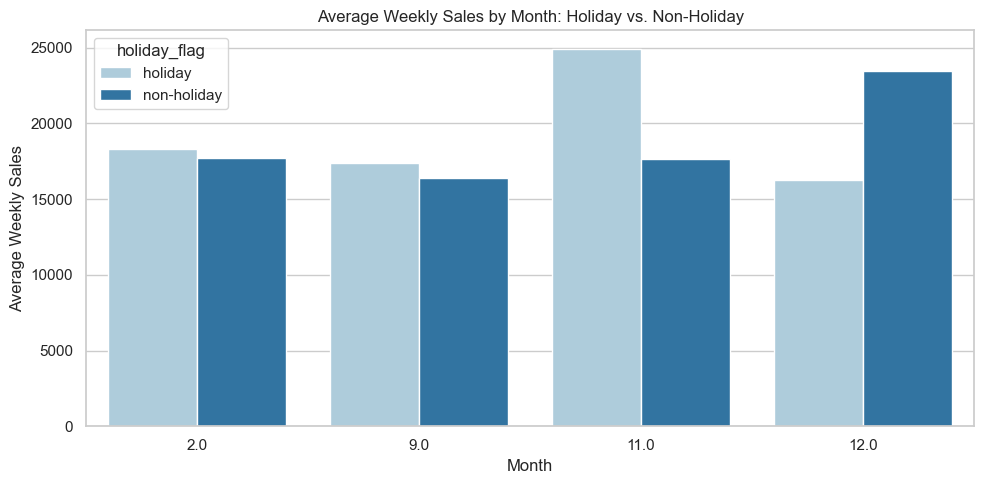

---

## What Departments Drive Holiday Lift
Department 72 (Electronics) shows the largest holiday lift by a wide margin, followed by Media & Gaming (Dept 5) and Toys (Dept 7). These align with typical gifting categories.

**Implication:** Electronics should receive priority in seasonal planning, including feature space, inventory depth, and promotional visibility. Secondary gifting categories should receive proportionate support.

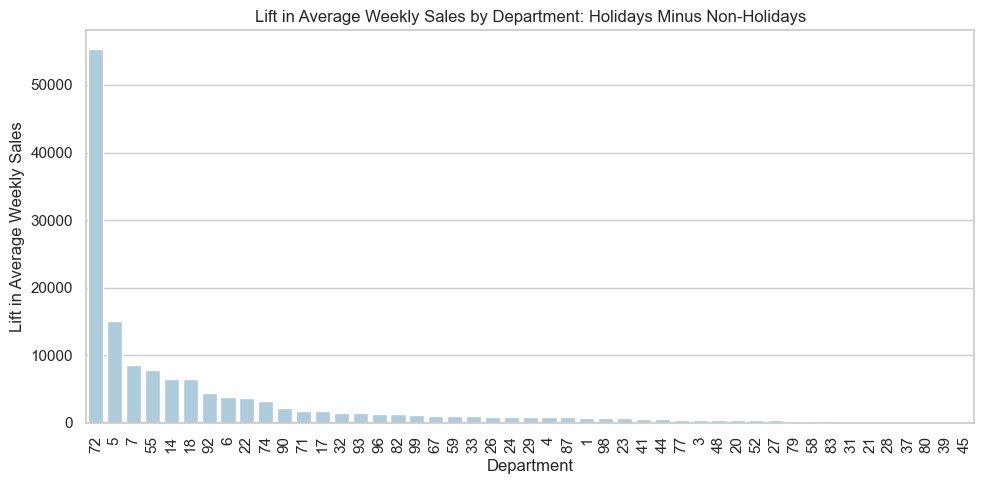

---

## What Stores Drive Holiday Lift  
Store 10 significantly outperforms all other locations during holiday periods, both in absolute lift and lift relative to its non‑holiday baseline.

**Implication:** Store 10’s holiday playbook—whether assortment, execution, or local marketing—should be reviewed and selectively replicated in comparable stores.

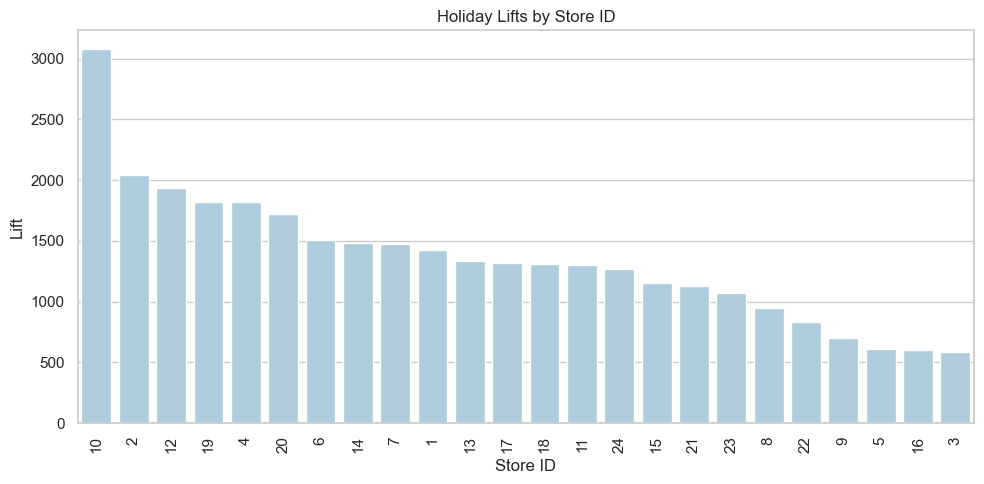

---

## Weather‑Driven Patterns Observed From the Data
**Comfortable temperatures lift traffic and conversion.**  

**Implication:** Increase promotional activation and category visibility during temperate periods to maximize volume.

**Extreme heat or cold suppresses trips.**  

**Implication:** Shift to weather‑responsive merchandising that prioritizes the items customers reach for first under each condition (hydration in heat, warming foods in cold). Reinforce digital channels to reduce friction for customers who prefer not to travel.

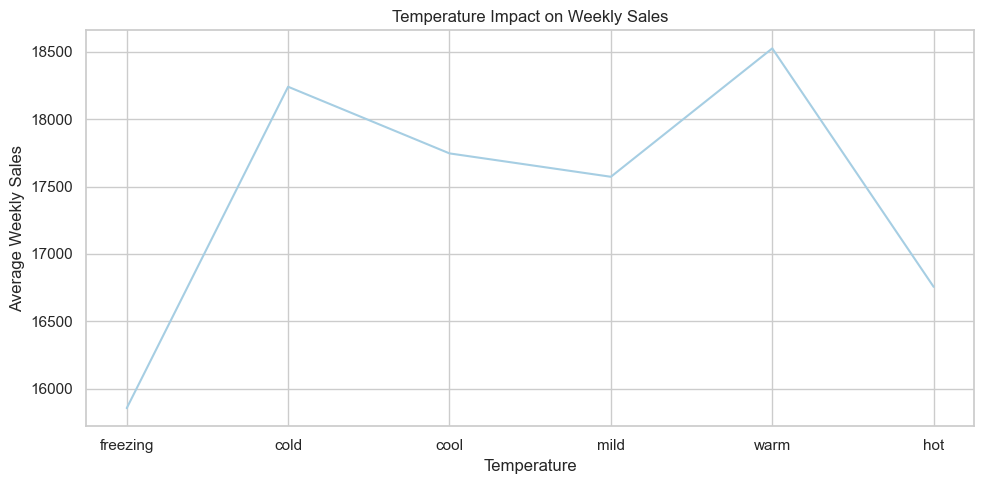



---

## Macroeconomic Effects on Sales
High unemployment materially dampens sales. CPI shows a moderate negative effect at mid‑to‑high levels.

**Implication:** During macro‑pressure periods, tighten assortments, emphasize value tiers, and use targeted promotions rather than broad discounting. Marketing should focus on essentials and retention to protect traffic without eroding margin.

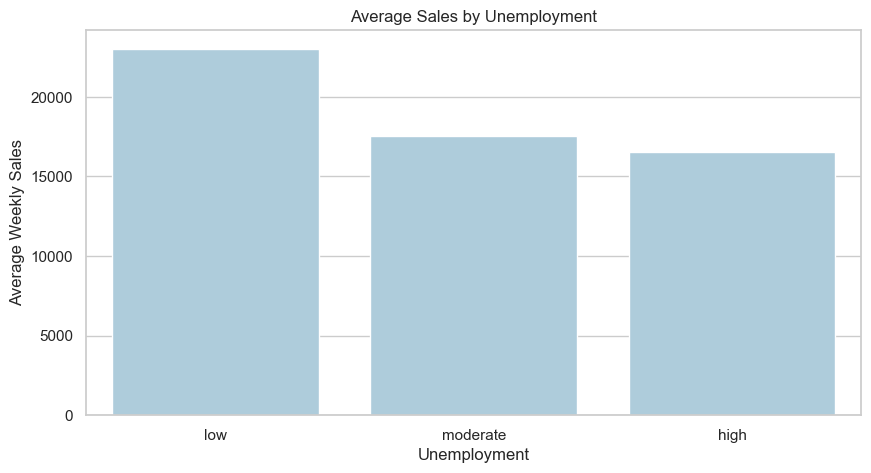
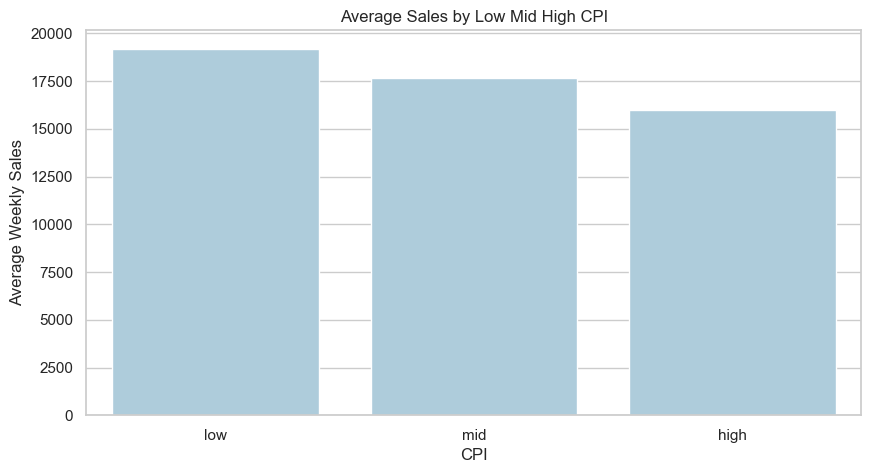

---

## Do Store Size and Type Have Different Holiday Lifts  
Both store types show holiday lift, but statistical testing indicates no meaningful difference between them.

**Implication:** Holiday strategy does not need to be differentiated by store type; focus should remain on individual store performance patterns rather than format‑level adjustments.


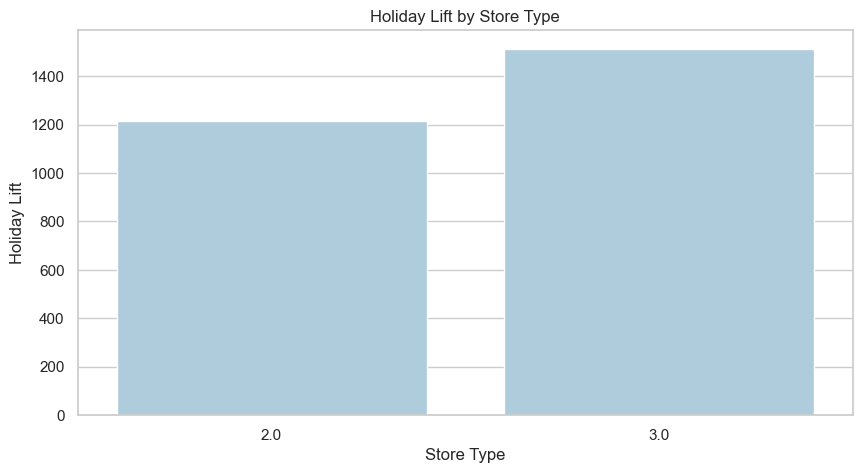

---



# Appendix:  All codes and details.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# default plot sizes
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 14}) 
# global palette
sns.set_theme(style="whitegrid", palette="Paired")

In [4]:
df = pd.read_csv('retail_w.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231483 entries, 0 to 231482
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   fact_id       231483 non-null  int64  
 1   store_id      231483 non-null  int64  
 2   dept          231483 non-null  int64  
 3   date          231483 non-null  object 
 4   is_holiday    231483 non-null  int64  
 5   temperature   231483 non-null  float64
 6   fuel_price    231483 non-null  float64
 7   weekly_sales  231483 non-null  float64
 8   cpi           231483 non-null  float64
 9   unemployment  231483 non-null  float64
 10  markdown1     231483 non-null  float64
 11  markdown2     231483 non-null  float64
 12  markdown3     231483 non-null  float64
 13  markdown4     231482 non-null  float64
 14  size          231482 non-null  float64
 15  type          231482 non-null  float64
 16  month         231483 non-null  float64
dtypes: float64(12), int64(4), object(1)
memory usage

## Holiday Timing
- As expected, holiday months show a clear lift. It lines up with the pattern we see in local supermarkets:  more open cashiers, heavier foot traffic — so the data basically confirms the seasonal pattern everyone already plans around.
- As expected, sales drop after the holidays. The data just confirms the usual pattern: demand cools off fast once the season ends.

In [86]:
# Holiday vs nonholiday sales by month
df['holiday_flag'] = df['is_holiday'].apply(lambda x: 'holiday' if x == 1 else 'non-holiday')
df_holiday = (
    df.groupby(["month", "holiday_flag"], as_index=False)["weekly_sales"]
      .mean()
      .sort_values(["month", "holiday_flag"])
)
print("df_holiday", "-"*20, "\n", df_holiday, "\n")



df_holiday -------------------- 
     month holiday_flag  weekly_sales
0     1.0  non-holiday  15483.586183
1     2.0      holiday  18298.549972
2     2.0  non-holiday  17687.741463
3     3.0  non-holiday  17109.236657
4     4.0  non-holiday  17305.612755
5     5.0  non-holiday  17324.121344
6     6.0  non-holiday  18025.221711
7     7.0  non-holiday  17448.507458
8     8.0  non-holiday  17701.646106
9     9.0      holiday  17406.137369
10    9.0  non-holiday  16364.922669
11   10.0  non-holiday  16722.667979
12   11.0      holiday  24894.354762
13   11.0  non-holiday  17648.652702
14   12.0      holiday  16293.875647
15   12.0  non-holiday  23460.994012 



In [87]:
# Select months that contain at least one holiday week
holiday_months = (
    df[df["is_holiday"] == 1]["month"]
    .dropna()
    .unique()
    .tolist()
)

print("holiday_months", "-"*20)
print(holiday_months)


holiday_months --------------------
[2.0, 9.0, 11.0, 12.0]


In [89]:
# Comparisons using months with holidays
df_holiday_comparison = df_holiday[df_holiday['month'].isin(holiday_months)]
df_holiday_comparison

,month,holiday_flag,weekly_sales
1,2.0,holiday,18298.549972
2,2.0,non-holiday,17687.741463
9,9.0,holiday,17406.137369
10,9.0,non-holiday,16364.922669
12,11.0,holiday,24894.354762
13,11.0,non-holiday,17648.652702
14,12.0,holiday,16293.875647
15,12.0,non-holiday,23460.994012


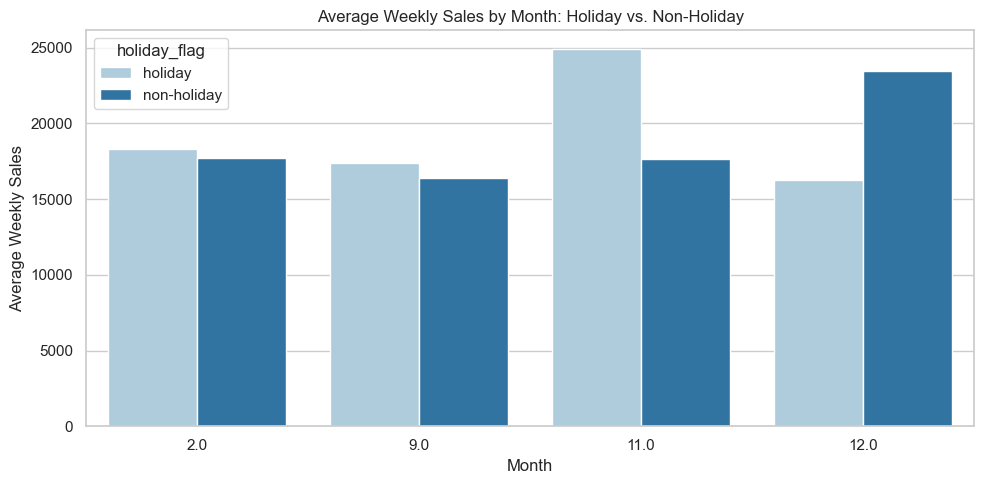

In [92]:
df_holiday_comparison

plt.figure(figsize=(10,5))
sns.barplot(data=df_holiday_comparison, x="month", y="weekly_sales", errorbar=None, hue = "holiday_flag")
plt.title("Average Weekly Sales by Month: Holiday vs. Non-Holiday")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()


## Insights:  
### Thanksgiving in November marks the start of a lot of pre-Christmas shopping, e.g. Black Friday sales.
### This pre-Christmas shopping continues until the week leading to the Christmas week.  The actual Christmas week no longer shows heavy shopping.
### Implication: store preparations should continue to happen in October and Christmas week might not require as much staffing.

## By Department

- If certain departments show strong holiday lift, then those departments should receive priority in seasonal staffing and replenishment.
- If some departments show negative holiday lift, then promotional strategy or assortment may need review.

In [70]:
# Holiday lift by department
df_dept_lift = (
    df.groupby(["dept", "is_holiday"], as_index=False)["weekly_sales"]
      .mean()
      .pivot(index="dept", columns="is_holiday", values="weekly_sales")
      .rename(columns={0: "nonholiday", 1: "holiday"})
)
df_dept_lift["holiday_lift"] = df_dept_lift["holiday"] - df_dept_lift["nonholiday"]
df_dept_lift

is_holiday,nonholiday,holiday,holiday_lift
dept,,,
1,22600.100522,23374.500085,774.399563
2,52925.840250,51262.773787,-1663.066463
3,15148.989721,15643.674043,494.684322
4,29679.188131,30556.438675,877.250544
5,27110.420061,42252.498596,15142.078535
...,...,...,...
95,74599.604059,70720.497234,-3879.106825
96,13806.479434,15154.858160,1348.378725
97,14380.669573,14193.397848,-187.271725


In [71]:
# Filter only those departments with positive holiday lift
df_dept_positive_lift = df_dept_lift[df_dept_lift['holiday_lift'] > 0].sort_values(by="holiday_lift", ascending = False).reset_index()
df_dept_positive_lift


is_holiday,dept,nonholiday,holiday,holiday_lift
0,72,58607.004105,113908.433574,55301.429470
1,5,27110.420061,42252.498596,15142.078535
2,7,30648.102926,39240.715470,8592.612544
3,55,11788.103974,19573.500894,7785.396920
4,14,18203.503459,24761.857617,6558.354158
5,18,8905.923419,15339.899000,6433.975581
6,92,75519.279145,79997.260681,4477.981536
7,6,5511.534770,9299.707191,3788.172422
8,22,11705.414663,15355.065277,3649.650613
9,74,17643.450710,20935.250468,3291.799758


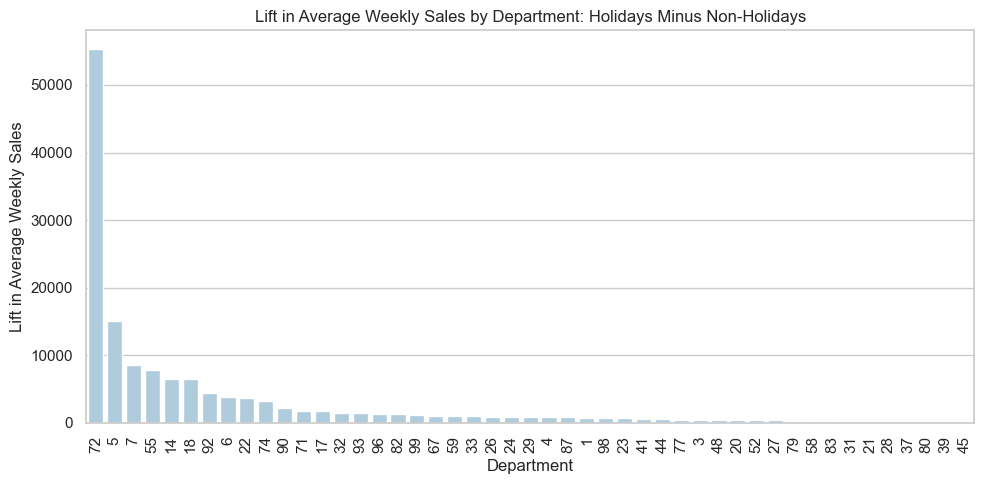

In [95]:
sns.barplot(data=df_dept_positive_lift, 
            x="dept", 
            y="holiday_lift", 
            order = df_dept_positive_lift.sort_values("holiday_lift", ascending = False)["dept"])
plt.title("Lift in Average Weekly Sales by Department: Holidays Minus Non-Holidays")
plt.xlabel("Department")
plt.ylabel("Lift in Average Weekly Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Insight: Department 72 has the highest holiday lift, way above all other departments, and should be given priority during holiday planning.
- Based on research, department 72 is Electronics.  https://www.scribd.com/document/492388233/Walmart-Department-Numbers

## Performance By Store Sizes and Store IDs


In [73]:
# Sales by store type and size exploration
df_store_perf = (
    df.groupby(["store_id", "type", "size"], as_index=False)["weekly_sales"]
      .mean()
)
df_store_perf


,store_id,type,size,weekly_sales
0,1,3.0,151315.0,21704.130869
1,2,3.0,202307.0,26898.070031
2,3,2.0,37392.0,6373.033983
3,4,3.0,205863.0,29161.210415
4,5,2.0,34875.0,5053.415813
5,6,3.0,202505.0,21913.243624
6,7,2.0,70713.0,8358.766148
7,8,3.0,155078.0,13133.014768
8,9,2.0,125833.0,8772.890379
9,10,2.0,126512.0,26332.303819


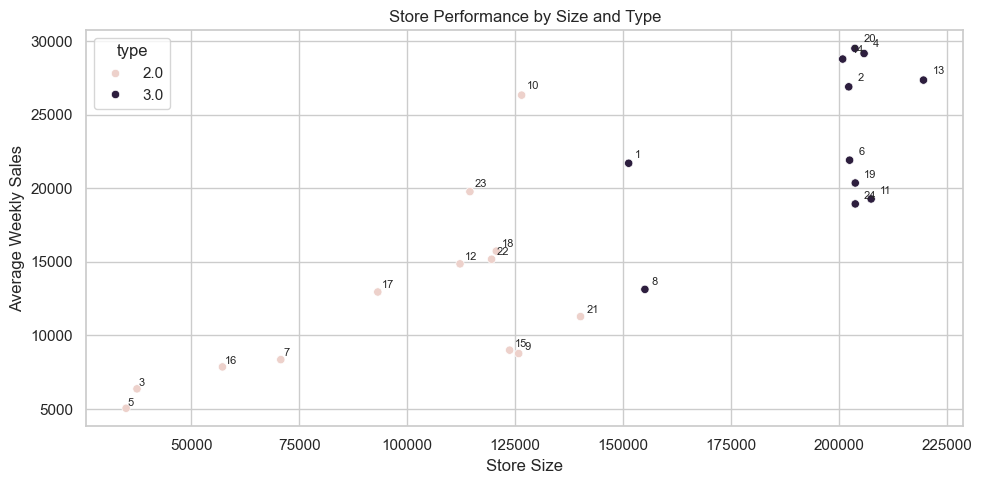

In [74]:
df_store_perf = (
    df.groupby(["store_id", "type", "size"], as_index=False)["weekly_sales"]
      .mean()
)


ax = sns.scatterplot(data=df_store_perf, 
                x="size", 
                y="weekly_sales", 
                hue="type")

for _, row in df_store_perf.iterrows():
    label = f"{int(row['store_id'])}"  # force integer, then string

    ax.text(
        row["size"] + 0.01 * row["size"],
        row["weekly_sales"] + 0.01 * row["weekly_sales"],
        label,
        fontsize=8,
        ha="left",
        va="bottom"
    )


plt.title("Store Performance by Size and Type")
plt.xlabel("Store Size")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()


In [75]:
# Sales Per Unit Size
df_store_perf["sales_per_unit_size"] = (
    df_store_perf["weekly_sales"] / df_store_perf["size"]
)
df_store_perf['average_sales_per_unit_size'] = df_store_perf["sales_per_unit_size"].mean()
df_store_perf = df_store_perf.sort_values(by = "sales_per_unit_size", ascending = False)
df_store_perf

,store_id,type,size,weekly_sales,sales_per_unit_size,average_sales_per_unit_size
9,10,2.0,126512.0,26332.303819,0.208141,0.125542
22,23,2.0,114533.0,19776.180881,0.172668,0.125542
2,3,2.0,37392.0,6373.033983,0.170438,0.125542
4,5,2.0,34875.0,5053.415813,0.144901,0.125542
19,20,3.0,203742.0,29508.301592,0.144832,0.125542
0,1,3.0,151315.0,21704.130869,0.143437,0.125542
13,14,3.0,200898.0,28784.851727,0.143281,0.125542
3,4,3.0,205863.0,29161.210415,0.141653,0.125542
16,17,2.0,93188.0,12954.393636,0.139014,0.125542
15,16,2.0,57197.0,7863.224124,0.137476,0.125542


- Stores 8, 21, 15 and 9 are struggling.  

## Holiday lifts by store

In [28]:
# Holiday lift by department
df_storeid_lift = (
    df.groupby(["store_id", "is_holiday"], as_index = False)["weekly_sales"]
      .mean()
      .pivot(index="store_id", columns="is_holiday", values="weekly_sales")
      .rename(columns={0: "nonholiday", 1: "holiday"})   
      .reset_index()
)
# Remove the annoying "is_holiday" label from the columns axis 
df_storeid_lift.columns.name = None # or: .rename_axis(None, axis=1)

df_storeid_lift["holiday_lift"] = df_storeid_lift["holiday"] - df_storeid_lift["nonholiday"]
df_storeid_lift_avg = df_storeid_lift["holiday_lift"].mean().round(2)
df_storeid_lift["lift_vs_avg"] = df_storeid_lift["holiday_lift"] - df_storeid_lift_avg
df_storeid_lift = df_storeid_lift.sort_values(by = "holiday_lift", ascending = False)
df_storeid_lift 

,store_id,nonholiday,holiday,holiday_lift,lift_vs_avg
9,10,26116.166656,29195.524157,3079.357501,1726.617501
1,2,26753.864227,28798.710526,2044.846300,692.106300
11,12,14731.304140,16663.842167,1932.538027,579.798027
18,19,20233.689681,22056.597678,1822.907997,470.167997
3,4,29032.260570,30854.231417,1821.970847,469.230847
19,20,29386.517928,31106.985906,1720.467978,367.727978
5,6,21806.854728,23313.563481,1506.708753,153.968753
13,14,28680.955485,30164.765263,1483.809779,131.069779
6,7,8254.246774,9730.828726,1476.581952,123.841952
0,1,21604.361066,23026.359441,1421.998375,69.258375


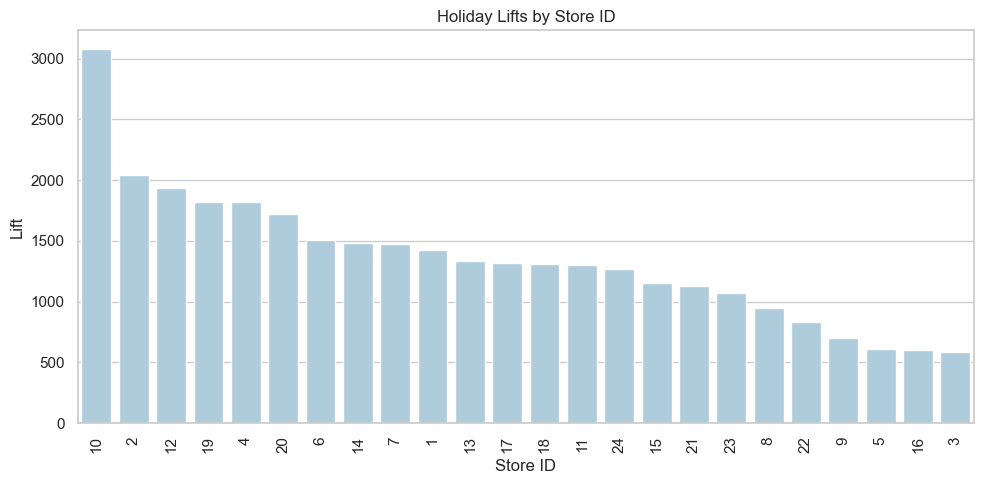

In [29]:
sns.barplot(data=df_storeid_lift, 
            x="store_id", 
            y="holiday_lift", 
            order = df_storeid_lift.sort_values("holiday_lift", ascending = False)["store_id"])
plt.title("Holiday Lifts by Store ID")
plt.xlabel("Store ID")
plt.ylabel("Lift")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Insight: Store 10 outperforms all others during holidays.  Other stores may try to re-apply their tactics to boost holiday sales.

## Holidays vs. Non-holidays average weekly sales by store_type

- If larger stores outperform smaller ones during holidays, then distribution should allocate more seasonal inventory to high‑capacity locations.
- If store type 3 underperforms type 2 during holidays, then localized marketing or assortment adjustments may be required.

In [31]:
df_type = df.groupby('type')['weekly_sales'].mean().reset_index()
df_type_holidays = df[df['is_holiday'] == 1].groupby('type')['weekly_sales'].mean().round(0).reset_index()
df_type_nonholidays =  df[df['is_holiday'] == 0].groupby('type')['weekly_sales'].mean().round(0).reset_index()
df_type_hnh = df_type_holidays.merge(df_type_nonholidays, on = 'type', how = 'inner', suffixes = ('_h', '_nh'))
df_type_hnh['holiday_lift'] = df_type_hnh['weekly_sales_h'] - df_type_hnh['weekly_sales_nh']
df_type_hnh

,type,weekly_sales_h,weekly_sales_nh,holiday_lift
0,2.0,13750.0,12536.0,1214.0
1,3.0,25049.0,23535.0,1514.0


Text(0, 0.5, 'Holiday Lift')

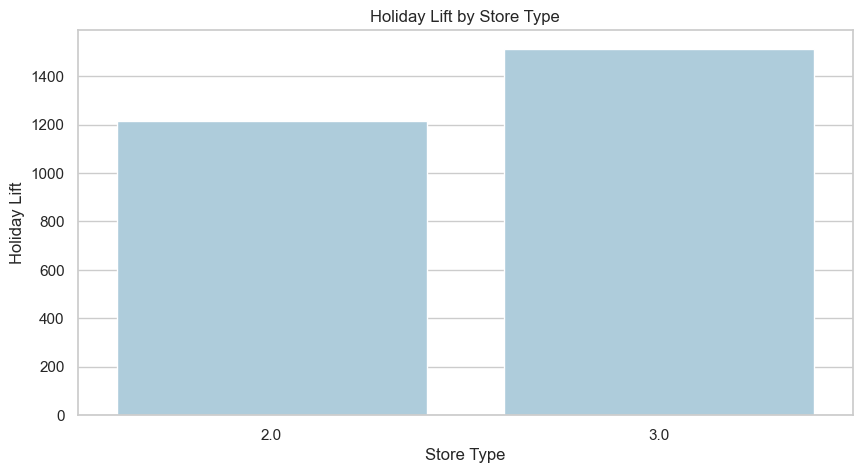

In [32]:
sns.barplot(df_type_hnh, x = "type", y = "holiday_lift")
plt.title("Holiday Lift by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Holiday Lift")

## Holiday lift appears on both store types, but does not appear significant.  Verifying with t-test...
- scipy.stats ttest_ind for a two-sample test
- p < 0.05 → difference is statistically significant
- p ≥ 0.05 → difference is not significant (likely noise)

In [33]:
df_lift_type = (
    df.groupby(["store_id", "type", "is_holiday"], as_index=False)["weekly_sales"]
      .mean()
      .pivot(index=["store_id", "type"], columns="is_holiday", values="weekly_sales")
      .reset_index()
)

df_lift_type = df_lift_type.rename(columns={0: "nh", 1: "h"})
df_lift_type["holiday_lift"] = df_lift_type["h"] - df_lift_type["nh"]
df_lift_type

is_holiday,store_id,type,nh,h,holiday_lift
0,1,3.0,21604.361066,23026.359441,1421.998375
1,2,3.0,26753.864227,28798.710526,2044.846300
2,3,2.0,6332.098604,6916.446288,584.347683
3,4,3.0,29032.260570,30854.231417,1821.970847
4,5,2.0,5010.249172,5617.212609,606.963437
5,6,3.0,21806.854728,23313.563481,1506.708753
6,7,2.0,8254.246774,9730.828726,1476.581952
7,8,3.0,13066.406406,14013.374425,946.968019
8,9,2.0,8723.575683,9423.213136,699.637453
9,10,2.0,26116.166656,29195.524157,3079.357501


In [35]:
from scipy.stats import ttest_ind

lift_2 = df_lift_type[df_lift_type["type"] == 2]["holiday_lift"].dropna()
lift_3 = df_lift_type[df_lift_type["type"] == 3]["holiday_lift"].dropna()

t_stat, p_val = ttest_ind(lift_2, lift_3, equal_var=False)
print("t-stat:", t_stat)
print("p-value:", p_val)


t-stat: -1.4094726576142609
p-value: 0.17633000618547442


## Insight: Statistically, the difference in lifts between store types is not big enough to warrant a store-type specific strategy for holiday sales.

## Markdown synergies

- Markdown is a necessary tactical activity for all retailers, as it involves price-skimming while moving out inventory to make room for new ones. 
- Correlation between markdown activities will help understand synergies between markdown types. 

In [38]:
# Correlation of markdowns with weekly_sales
markdown_cols = ["markdown1", "markdown2", "markdown3", "markdown4"]
df_markdown_corr = df[["weekly_sales"] + markdown_cols].corr().round(2)
df_markdown_corr


,weekly_sales,markdown1,markdown2,markdown3,markdown4
weekly_sales,1.00,0.04,0.02,0.04,0.03
markdown1,0.04,1.00,0.17,-0.02,0.85
markdown2,0.02,0.17,1.00,-0.01,0.10
markdown3,0.04,-0.02,-0.01,1.00,-0.01
markdown4,0.03,0.85,0.10,-0.01,1.00


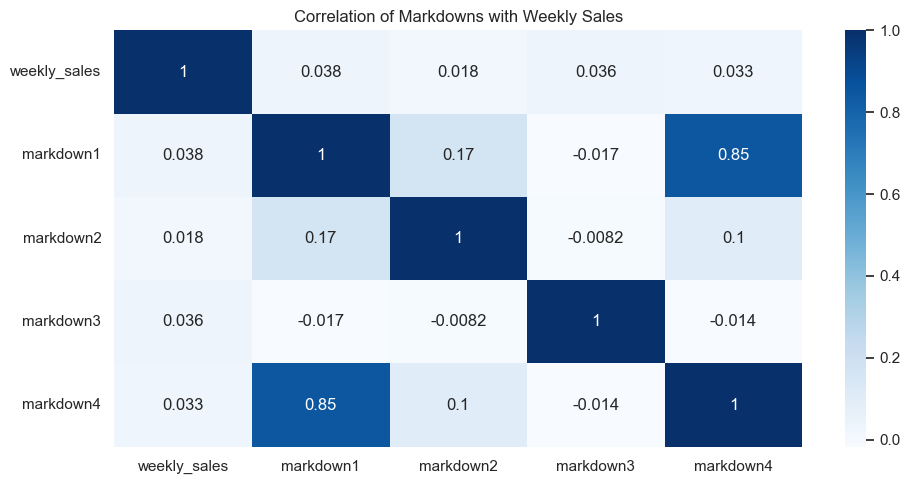

In [36]:
markdown_cols = ["markdown1", "markdown2", "markdown3", "markdown4"]
df_markdown_corr = df[["weekly_sales"] + markdown_cols].corr()

sns.heatmap(df_markdown_corr, annot=True, cmap="Blues")
plt.title("Correlation of Markdowns with Weekly Sales")
plt.tight_layout()
plt.show()


## Insight:  Markdown type 1 and Markdown type 4 have inherent synergies that can be further explored.

## Economic indicators - fuel prices, cpi, unemployment
- If higher fuel prices suppress weekly_sales, then stores in high‑commute areas may need targeted promotions during fuel spikes.

- If unemployment correlates with lower sales, then demand forecasting should incorporate local economic conditions.

In [40]:
# Correlation of economic indicators with weekly_sales
econ_cols = ["fuel_price", "cpi", "unemployment"]
df_econ_corr = df[["weekly_sales"] + econ_cols].corr().round(2)
df_econ_corr


,weekly_sales,fuel_price,cpi,unemployment
weekly_sales,1.00,0.01,-0.07,0.00
fuel_price,0.01,1.00,-0.14,-0.04
cpi,-0.07,-0.14,1.00,-0.26
unemployment,0.00,-0.04,-0.26,1.00


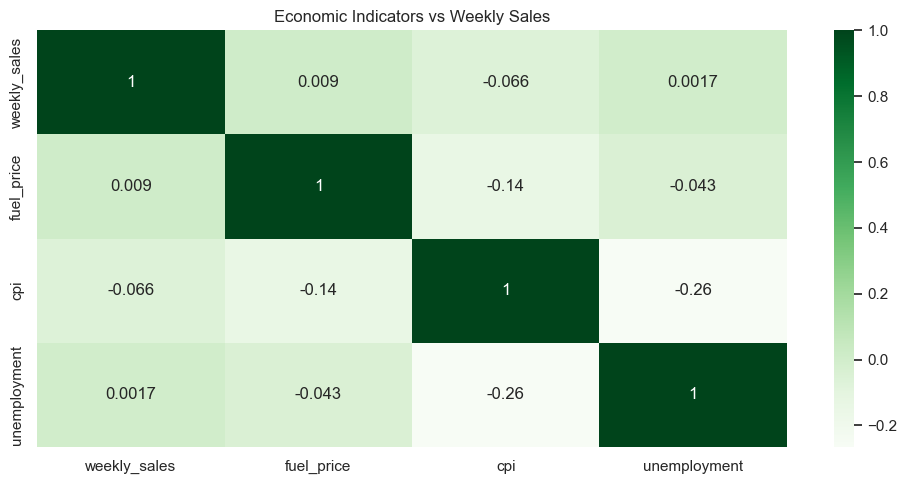

In [41]:
econ_cols = ["fuel_price", "cpi", "unemployment"]
df_econ_corr = df[["weekly_sales"] + econ_cols].corr()

sns.heatmap(df_econ_corr, annot=True, cmap="Greens")
plt.title("Economic Indicators vs Weekly Sales")
plt.tight_layout()
plt.show()


## Insight: Fuel prices, unemployment and cpi have weak correlations with weekly sales. These economic indicators may be more useful for granular demand planning.

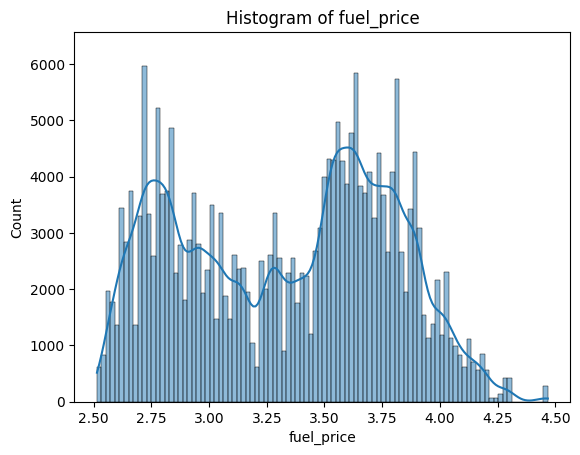


  fuel_bins  weekly_sales
0       low      17348.97
1       mid      18237.87
2      high      17688.07


Text(0, 0.5, 'Average Weekly Sales')

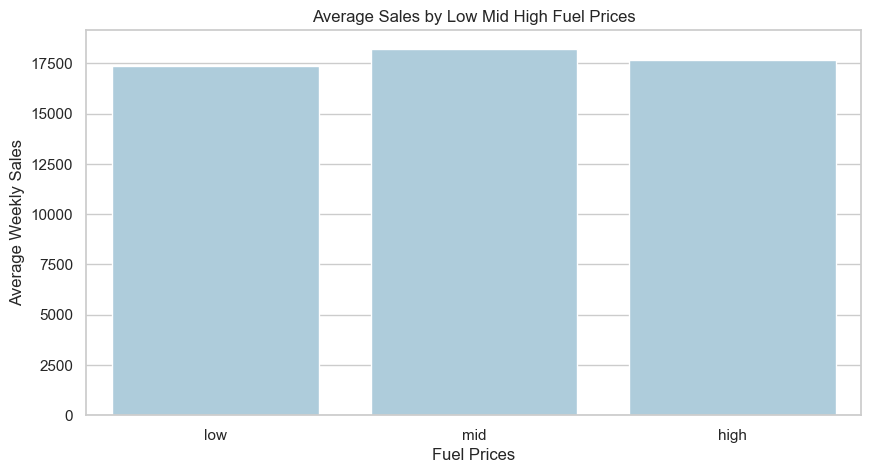

In [107]:

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Fuel price bins (based on two strong modes)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

fuel_bins = [df["fuel_price"].min(), 3.00, 3.40, df["fuel_price"].max()]
fuel_labels = ["low", "mid", "high"]

df["fuel_bins"] = pd.cut(
    df["fuel_price"],
    bins=fuel_bins,
    labels=fuel_labels,
    include_lowest=True,
    right=True
)

df_fuel = df.groupby("fuel_bins")["weekly_sales"].mean().round(2).reset_index()
print(df_fuel)

sns.barplot(df_fuel, x = "fuel_bins", y = "weekly_sales")
plt.title("Average Sales by Low Mid High Fuel Prices")
plt.xlabel("Fuel Prices")
plt.ylabel("Average Weekly Sales")


## Insight: Fuel prices do not seem to have a major effect on weekly sales as much as holidays. 

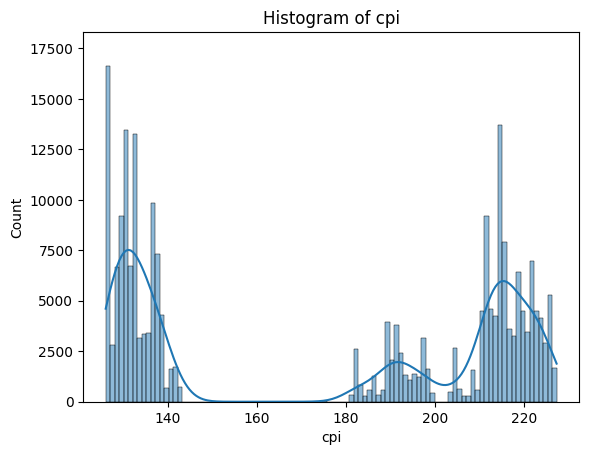

  cpi_bins  weekly_sales
0      low      19198.04
1      mid      17645.93
2     high      15960.51


Text(0, 0.5, 'Average Weekly Sales')

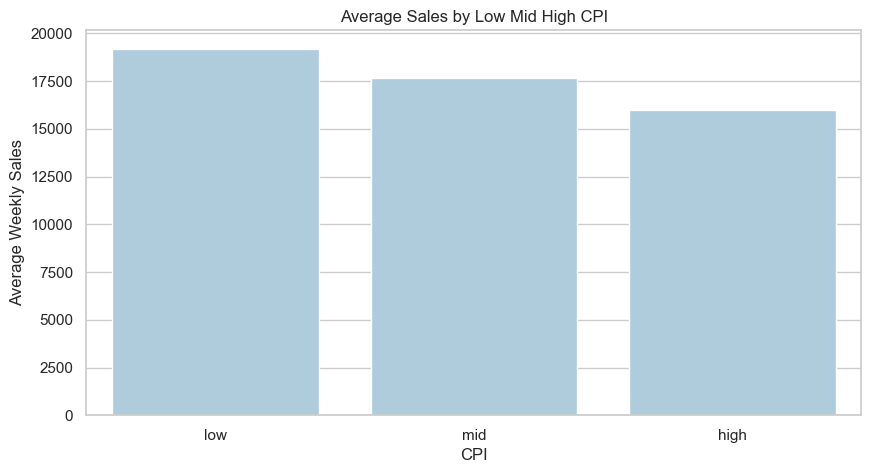

In [110]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CPI bins (based on bimodal histogram)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

cpi_bins = [df["cpi"].min(), 180, 210, df["cpi"].max()]
cpi_labels = ["low", "mid", "high"]

df["cpi_bins"] = pd.cut(
    df["cpi"],
    bins=cpi_bins,
    labels=cpi_labels,
    include_lowest=True,
    right=True
)

df_cpi = df.groupby("cpi_bins")["weekly_sales"].mean().round(2).reset_index()
print(df_cpi)

sns.barplot(df_cpi, x = "cpi_bins", y = "weekly_sales")
plt.title("Average Sales by Low Mid High CPI")
plt.xlabel("CPI")
plt.ylabel("Average Weekly Sales")

## Insight: CPI has a moderate effect on weekly sales from mid to high cpi.

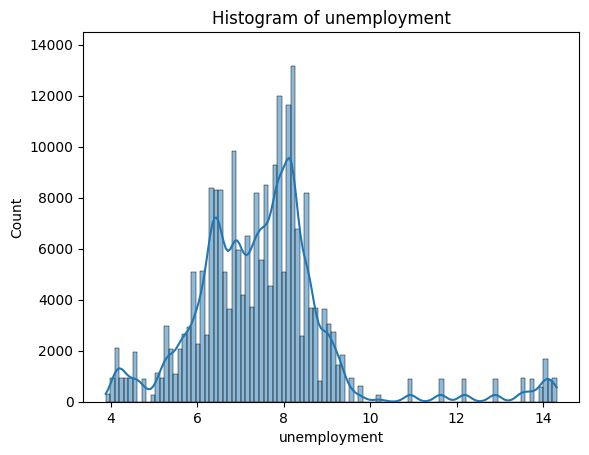

  unemployment_bins  weekly_sales
0               low      23043.82
1          moderate      17555.73
2              high      16541.44


Text(0, 0.5, 'Average Weekly Sales')

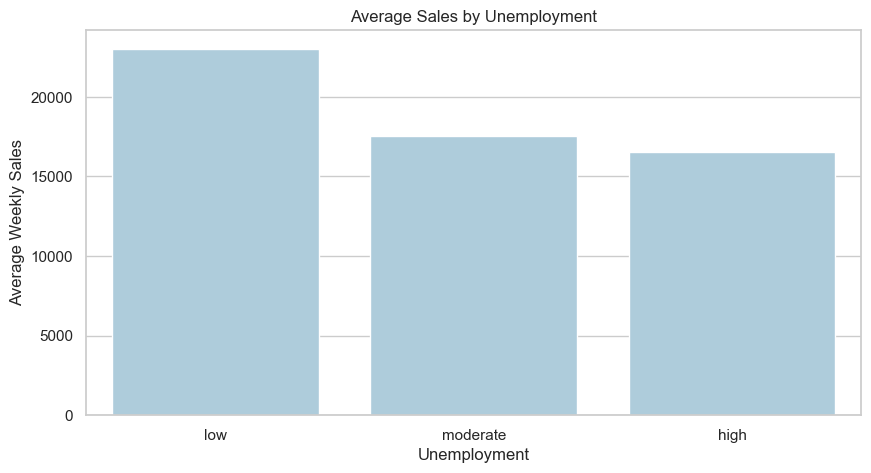

In [105]:

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Unemployment bins (based on peak at 8)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

unemploy_bins = [df["unemployment"].min(), 5, 9, df["unemployment"].max()]
unemploy_labels = ["low", "moderate", "high"]

df["unemployment_bins"] = pd.cut(
    df["unemployment"],
    bins=unemploy_bins,
    labels=unemploy_labels,
    include_lowest=True,
    right=True
)

df_unemploy = df.groupby("unemployment_bins")["weekly_sales"].mean().round(2).reset_index()
print(df_unemploy)

sns.barplot(df_unemploy, x = "unemployment_bins", y = "weekly_sales")
plt.title("Average Sales by Unemployment")
plt.xlabel("Unemployment")
plt.ylabel("Average Weekly Sales")

## High unemployment also has a noticeable effect on weekly average sales

## Weather effects

- If lower temperatures increase sales for specific departments, then cold‑weather inventory should be prioritized in those weeks.

- If extreme temperatures reduce store traffic, then online or pickup promotions may offset lost in‑store demand.

In [42]:
# Temperature impact on weekly_sales
df_temp = (
    df.groupby("temperature", as_index=False)["weekly_sales"]
      .mean()
      .sort_values("temperature")
)
df_temp

,temperature,weekly_sales
0,-2.06,8087.358986
1,6.23,15696.683188
2,7.46,8606.890725
3,10.09,10017.635455
4,10.11,7549.590735
...,...,...
2609,95.61,13718.753571
2610,95.91,14919.543939
2611,96.31,13841.640152
2612,97.18,13884.890303


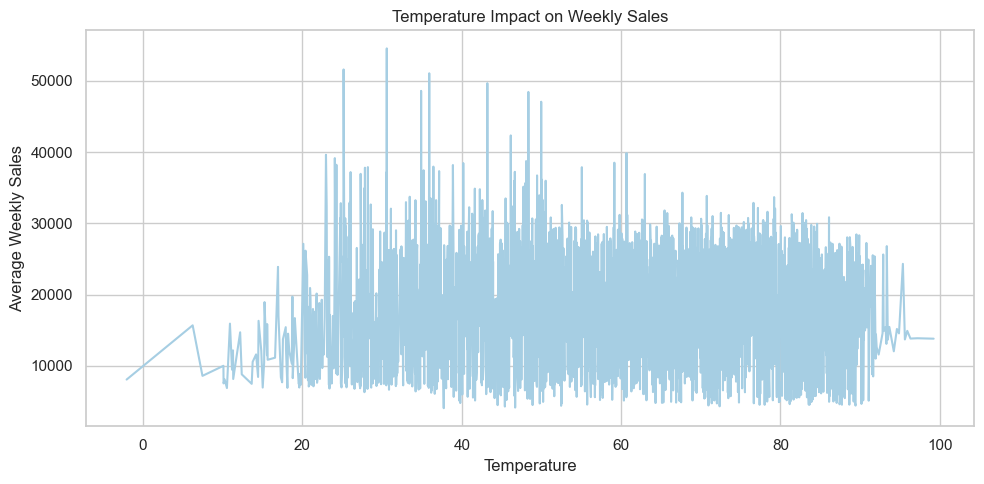

In [19]:
df_temp = (
    df.groupby("temperature", as_index=False)["weekly_sales"]
      .mean()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=df_temp, x="temperature", y="weekly_sales")
plt.title("Temperature Impact on Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()


## Too scattered.  Checking if temperature bins may lead to more insights...

In [51]:

# Create temperature bins (0 to 100 F)


bins = [0, 32, 50, 65, 75, 85, 100]
labels = ["freezing", "cold", "cool", "mild", "warm", "hot"]

df["temp_bins"] = pd.cut(
    df["temperature"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

df[['fact_id', 'date', 'temperature', 'temp_bins']]


,fact_id,date,temperature,temp_bins
0,0,2010-02-05,42.31,cold
1,1,2010-02-05,42.31,cold
2,2,2010-02-05,42.31,cold
3,3,2010-02-05,42.31,cold
4,4,2010-02-05,42.31,cold
...,...,...,...,...
231478,232414,2011-05-06,55.75,cool
231479,232415,2011-05-06,55.75,cool
231480,232416,2011-05-06,55.75,cool
231481,232417,2011-05-06,55.75,cool


In [58]:
import warnings
warnings.filterwarnings("ignore")

df_temp_bins = (
    df.groupby("temp_bins", as_index=False)["weekly_sales"]
      .mean().round(2).reset_index()
)
df_temp_bins

,index,temp_bins,weekly_sales
0,0,freezing,15855.14
1,1,cold,18240.80
2,2,cool,17746.13
3,3,mild,17572.64
4,4,warm,18525.44
5,5,hot,16755.67


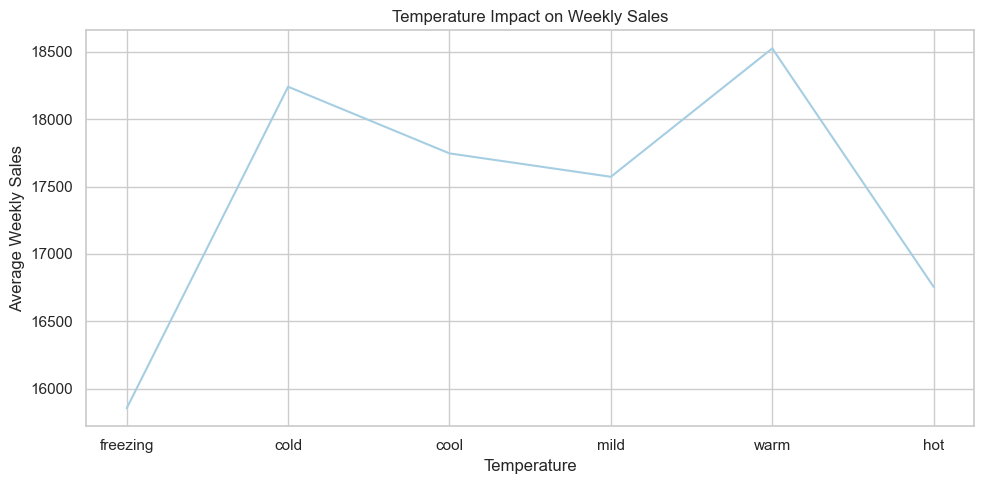

In [ ]:
#  Effect of temperature on weekly sales

sns.lineplot(data=df_temp_bins, x="temp_bins", y="weekly_sales")
plt.title("Temperature Impact on Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()

## Insight:  Extreme heat and extreme cold leads to lower weekly sales, likely due to customers not wanting to shop if the weather is uncomfortable.

## Returns and corrections
- Check if returns (negative weekly_sales) cluster after the holidays.
- If negative weekly_sales cluster after holidays, then return policies or post‑holiday staffing may need adjustment.

In [80]:
# Identify negative weekly_sales patterns

df_returns = df[df["weekly_sales"] < 0].copy()

df_returns_monthly = (
    df_returns.groupby(["month"], as_index=False)
              .agg(
                  negative_count=("weekly_sales", "count"),
                  avg_returns=("weekly_sales", "mean"),
                  sum_returns=("weekly_sales", "sum")
              )
              .sort_values("negative_count", ascending=False)
)

df_returns_monthly


,month,negative_count,avg_returns,sum_returns
5,6.0,96,-25.001875,-2400.18
4,5.0,73,-27.697945,-2021.95
2,3.0,71,-119.150704,-8459.70
6,7.0,60,-81.041667,-4862.50
7,8.0,59,-79.660339,-4699.96
8,9.0,57,-124.212982,-7080.14
3,4.0,57,-68.044561,-3878.54
11,12.0,54,-116.120741,-6270.52
0,1.0,48,-44.099167,-2116.76
1,2.0,42,-85.235238,-3579.88


## Insights:  June has unusually high return counts.  But the absolute amounts are manageable.